In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
face_cascade = cv2.CascadeClassifier('C:/Users/Akshay/Desktop/faceRecognition/model/open_cv/haarcascade_frontalface_default.xml')
eye_cascade  = cv2.CascadeClassifier('C:/Users/Akshay/Desktop/faceRecognition/model/open_cv/haarcascade_eye.xml')

In [3]:
def get_cropped_image(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

In [4]:
path_to_data = "C:/Users/Akshay/Desktop/faceRecognition/model/dataset/"
path_to_cr_data = "C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/"

In [5]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [6]:
img_dirs

['C:/Users/Akshay/Desktop/faceRecognition/model/dataset/Hardik_Pandya',
 'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/KL_Rahul',
 'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/MS_Dhoni',
 'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/Rohit_Sharma',
 'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/Virat_Kohli']

In [7]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [8]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    
            

Hardik_Pandya
Generating cropped images in folder:  C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya
KL_Rahul
Generating cropped images in folder:  C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/KL_Rahul
MS_Dhoni
Generating cropped images in folder:  C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/MS_Dhoni
Rohit_Sharma
Generating cropped images in folder:  C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Rohit_Sharma
Virat_Kohli
Generating cropped images in folder:  C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Virat_Kohli


In [9]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #converting to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_RGB2GRAY)
    #converting to float
    imArray = np.float32(imArray)
    imArray/= 255;
    #compute coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)
    
    #processing coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 255;
    
    #reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)
    
    return imArray_H

In [10]:
celebrity_file_names_dict

{'Hardik_Pandya': ['C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya1.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya2.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya3.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya4.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya5.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya6.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya7.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya8.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hardik_Pandya9.png',
  'C:/Users/Akshay/Desktop/faceRecognition/model/dataset/cropped/Hardik_Pandya/Hard

In [11]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'Hardik_Pandya': 0,
 'KL_Rahul': 1,
 'MS_Dhoni': 2,
 'Rohit_Sharma': 3,
 'Virat_Kohli': 4}

In [12]:
X =[]
y =[]

for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img,(32,32))
        img_har =w2d(img,'db1',5)
        scalled_image_har = cv2.resize(img_har, (32,32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_image_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])
        

In [13]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(210, 4096)

In [14]:
y

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4]

In [15]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C=10))])
pipe.fit(X_train, y_train)

pipe.score(X_test, y_test)

0.5283018867924528

In [17]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.63      0.80      0.71        15
           1       0.69      0.69      0.69        13
           2       1.00      0.33      0.50         6
           3       0.00      0.00      0.00         9
           4       0.26      0.50      0.34        10

    accuracy                           0.53        53
   macro avg       0.52      0.47      0.45        53
weighted avg       0.51      0.53      0.49        53



C:\Users\Akshay\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression 
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [19]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [20]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.560484,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.420968,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.586089,{'logisticregression__C': 5}


In [21]:
best_estimators['svm'].score(X_test, y_test)

0.6226415094339622

In [22]:
best_estimators['random_forest'].score(X_test, y_test)

0.5283018867924528

In [23]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.6037735849056604

In [24]:
best_clf = best_estimators['svm']

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, best_clf.predict(X_test))

Text(69.0, 0.5, 'Truth')

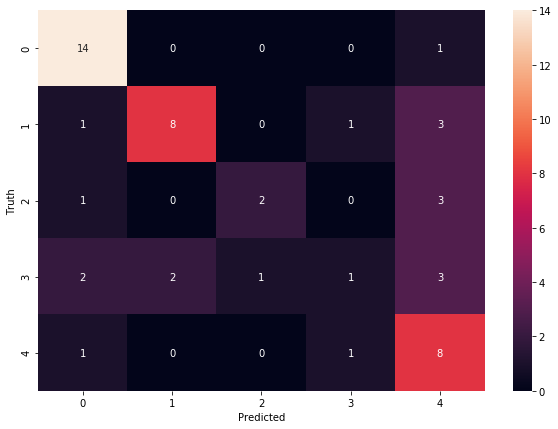

In [26]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [27]:
!pip install joblib
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'C:/Users/Akshay/Desktop/faceRecognition/model/saved_model.pkl') 

['C:/Users/Akshay/Desktop/faceRecognition/model/saved_model.pkl']

In [28]:
import json
with open("C:/Users/Akshay/Desktop/faceRecognition/model/class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))